In [2]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as ws

In [3]:
PI = np.pi

def sin(x, k, phi): return np.sin(2*PI*(k*x + phi))

### Senoidais interativas

In [20]:
X = np.linspace(0, 5, 200)

k_slider = ws.FloatSlider(min=0.2, max=5, description="k")

phi_slider = ws.FloatSlider(min=0, max=2, description="phi")

@ws.interact(k=k_slider, phi=phi_slider, y0=2)
def plotfun(k, phi):
    Y = sin(X, k, phi) + 2

    plt.subplots(figsize=(12, 3))
    plt.plot(X, Y, '-o')
    plt.ylim(bottom=0)
    plt.grid()
    plt.show()

interactive(children=(FloatSlider(value=0.2, description='k', max=5.0, min=0.2), FloatSlider(value=0.0, descri…

### Composição de senoidais

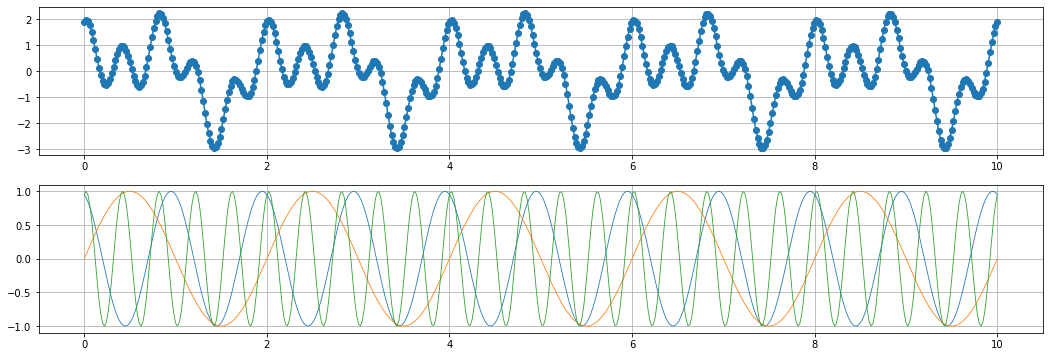

In [49]:
X = np.linspace(0, 10, 500)

freq_phase_pairs = [
    (1, 0.3),
    (0.5, 0),
    (2.5, 0.2),
]

f = lambda x: sum([sin(x, k, b) for k, b in freq_phase_pairs])

fig, axs = plt.subplots(2, 1, figsize=(18, 6))
ax = axs[0]
ax.plot(X, f(X), '-o')
ax.grid()

ax = axs[1]
for k, b in freq_phase_pairs:
    ax.plot(X, sin(X, k, b), '-', linewidth=0.8)
ax.grid()

plt.show()

### Efeito cumulativo da adição de componentes

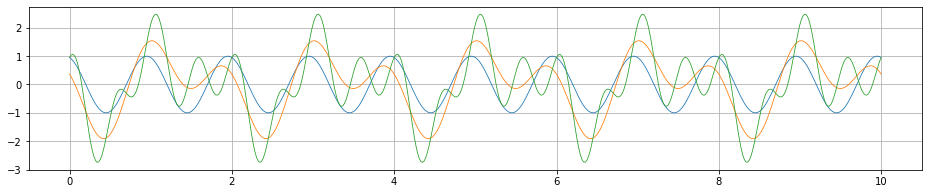

In [65]:
X = np.linspace(0, 10, 500)

freq_phase_pairs = [
    (1, 0.3),
    (0.5, 0.6),
    (2, 0.1),
]

fig, ax = plt.subplots(figsize=(16, 3))

for i, _ in enumerate(freq_phase_pairs):
    f = lambda x: sum([sin(x, k, b) for k, b in freq_phase_pairs[:i+1]])
    ax.plot(X, f(X), '-', linewidth=0.8)
ax.grid()

plt.show()

### Coeficiente de Fourier

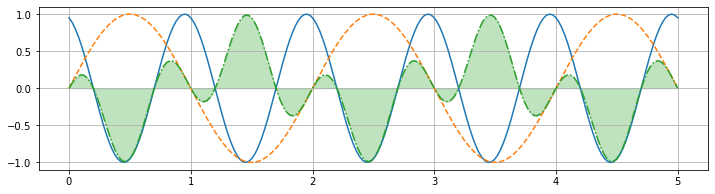

In [39]:
X = np.linspace(0, 5, 200)

f = lambda x: sin(x, 1, 0.3)

# g = lambda x: sin(x, 1, 0)
# g = lambda x: sin(x, 1, 0.55)
g = lambda x: sin(x, 0.5, 0)

h = lambda x: g(x) * f(x)

show_product = True

plt.subplots(figsize=(12, 3))
plt.plot(X, f(X), '-')
plt.plot(X, g(X), '--')

if show_product:
    plt.plot(X, h(X), '-.', color='C02')
    plt.fill_between(X, 0, h(X), color='C02', alpha=0.3)

plt.grid()
plt.show()

In [44]:
import scipy.integrate as integrate

result = integrate.quad(h, a=X[0], b=X[-1])

print(result)

(2.2981795390291575, 1.3780783892497483e-10)
